# Diamond Price Prediction
---
The objective of diamond price prediction is to develop a model that predicts the price of a diamond based on features like carat, cut, color, clarity, and dimensions. The goal is to identify key features influencing price and create an accurate, reliable prediction system.

---
### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

---
### Loading Data

##### This dataset contains prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

##### Feature Description:
  - price : prices are in US dollars
  - carat : physical weight (1 carat = 1/5 gram)
  - cut : categorised how diamonds are cut (Fair, Good, Very Good, Premium, Ideal)
  - color : color hues (D - best , J - worst)
  - clarity : classified characteristics of diamond (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
  - Dimensions
    - x length in mm
    - y width in mm
    - z depth in mm
  - depth : height of the diamond (depth = z/mean(x,y))
  - table : top flat part of diamond
    

In [3]:
data = pd.read_csv("diamonds.csv")

In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.shape

(53940, 11)

---
### Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


##### The first column is an index ("Unnamed: 0") and thus we are going to remove it.

In [7]:
data = data.drop(["Unnamed: 0"], axis=1)

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##### Here we can see minimum values of "x", "y" and "z" are zero. This indicates that there are faulty values in data as they represents diamentionless or two-dimentional diamonds. So we need to drop such data points.

In [9]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [10]:
data.shape

(53920, 10)

##### We lost 20 data points by droping the dimensionless(2-D or 1-D) diamonds.

---

#### Pairplot  of Data

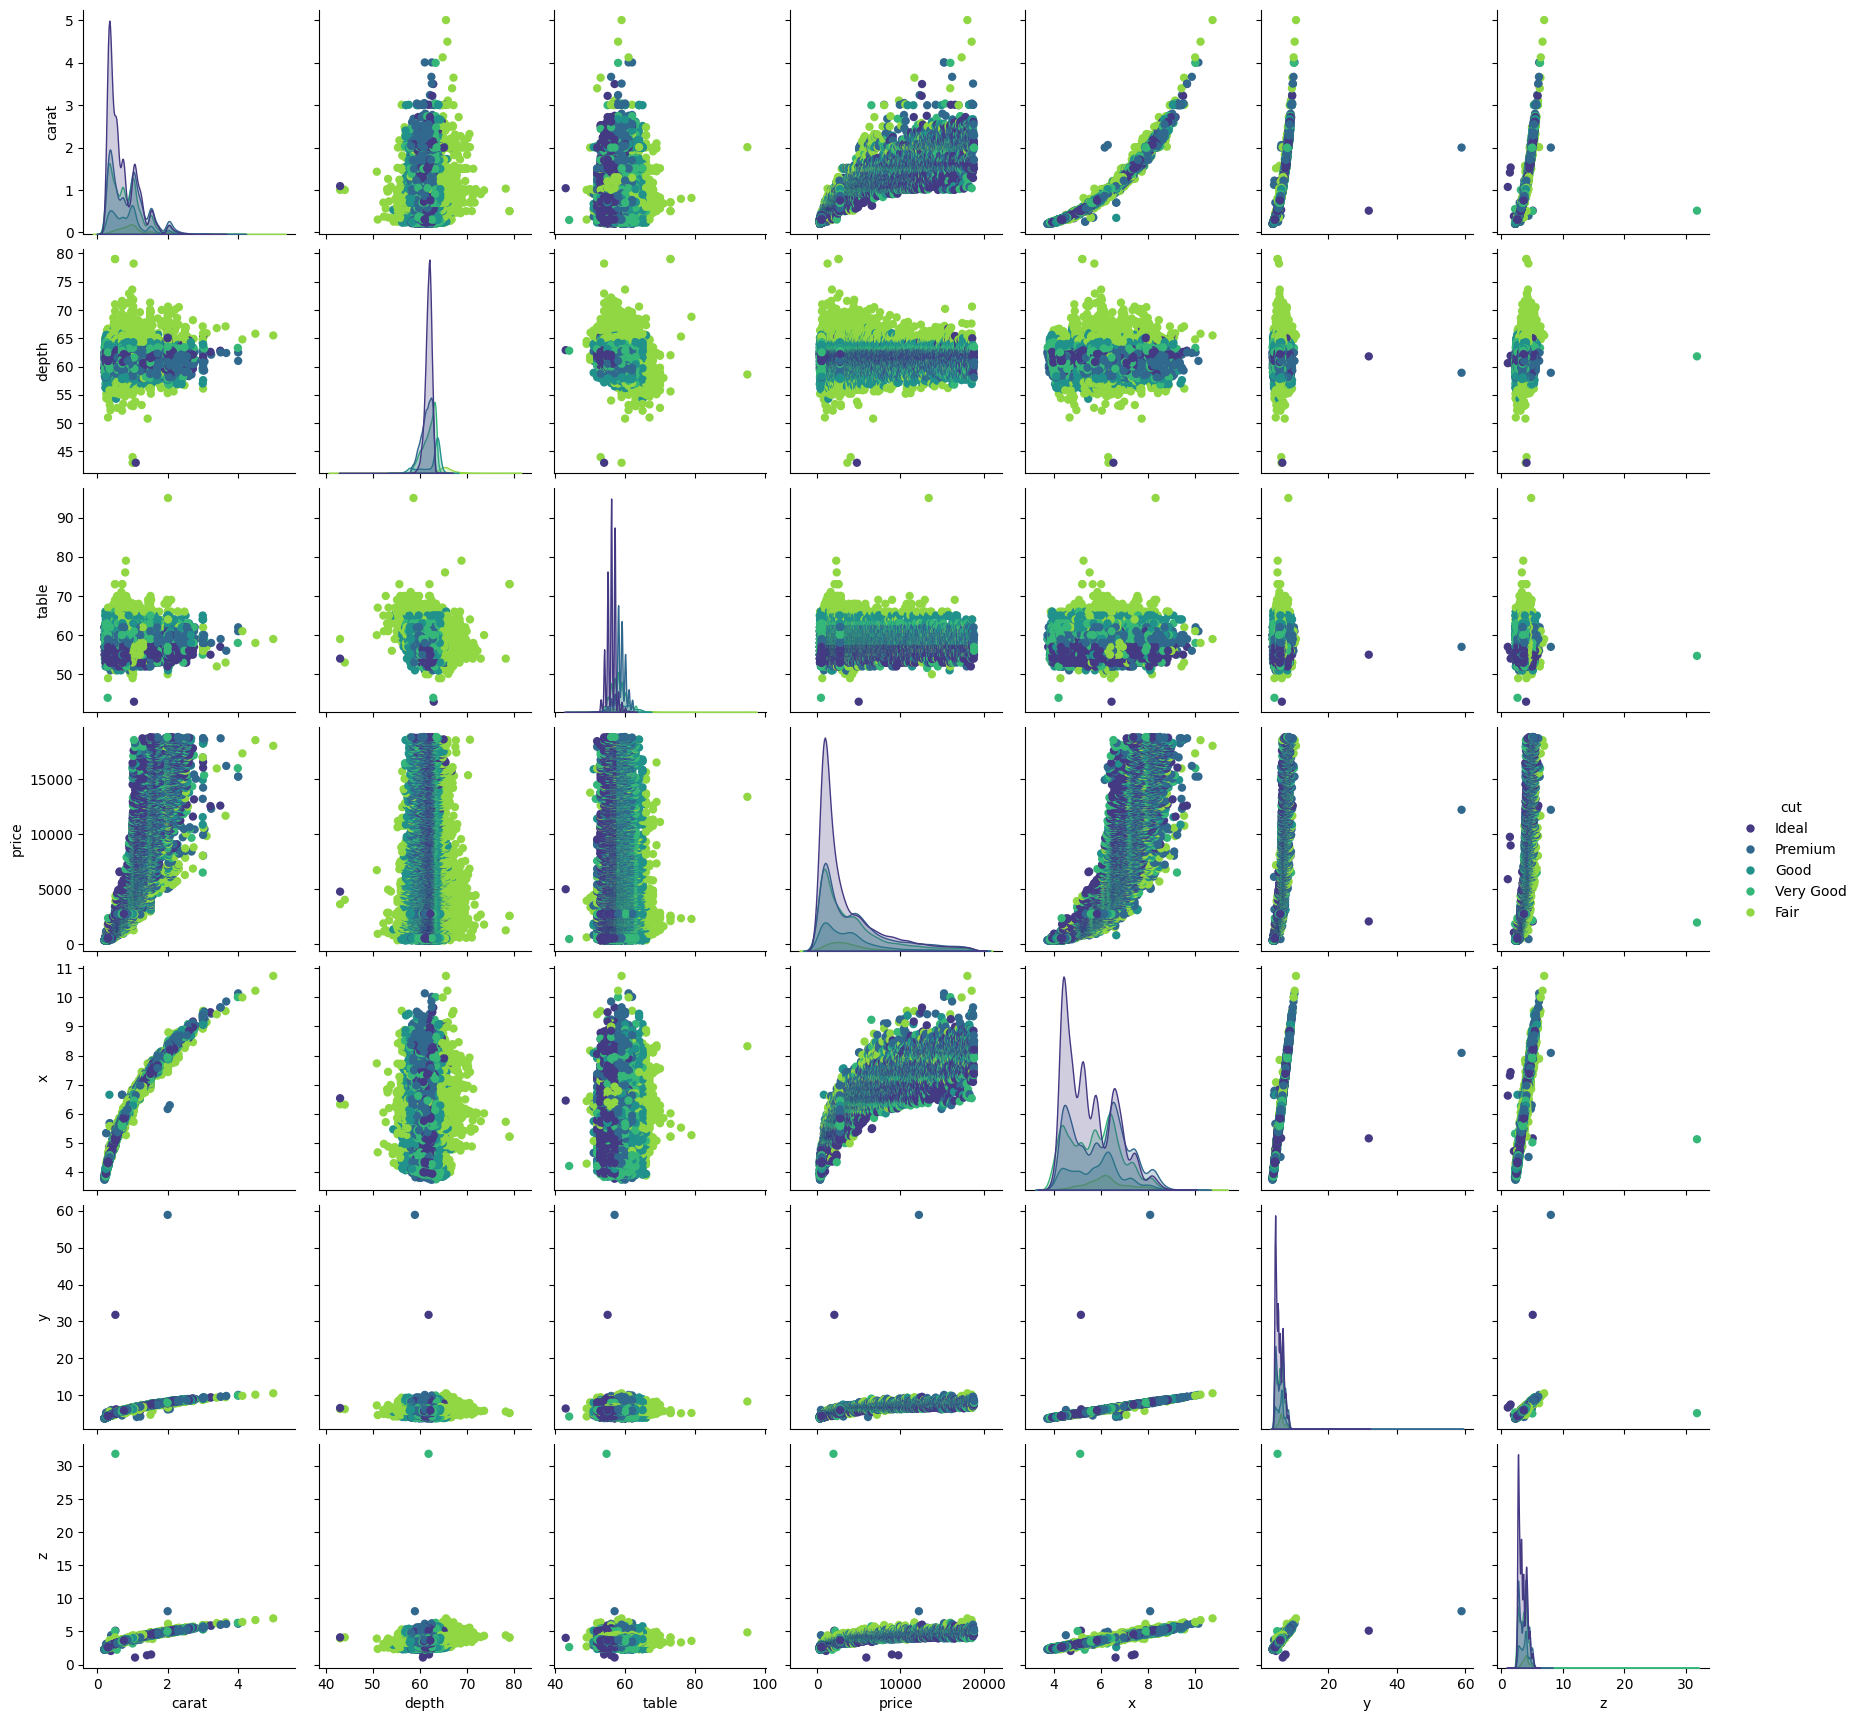

In [11]:
ax = sns.pairplot(data, hue="cut", palette="viridis", plot_kws={"edgecolor": "none"})

##### There are some features with datapoints that are far from rest of the dataset(outliers) which will affect the outcomes of our model.

- "y" and "z" have dimentional outliers that needs to be removed.
- "depth" and "table" should also be constrained for some data points

---
#### Regression Line Plot
- We will plot Regression Line to take a closer look at outliers.

Text(0.5, 1.0, 'Regression Line - price vs. y')

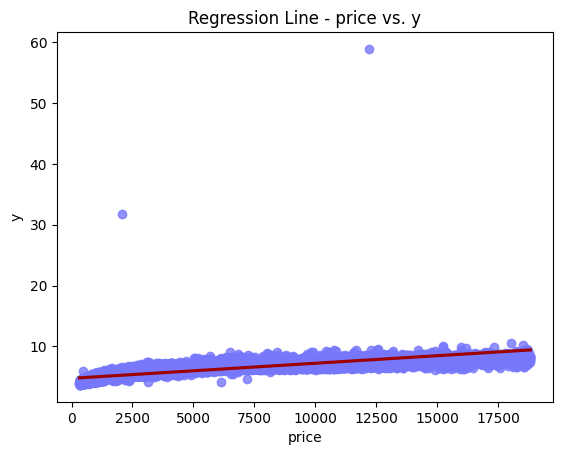

In [12]:
ax = sns.regplot(x="price", y="y", data=data, fit_reg=True, scatter_kws={"color": "#7777fc"}, line_kws={"color": "#9c0000"})
ax.set_title("Regression Line - price vs. y")

Text(0.5, 1.0, 'Regression Line - price vs. z')

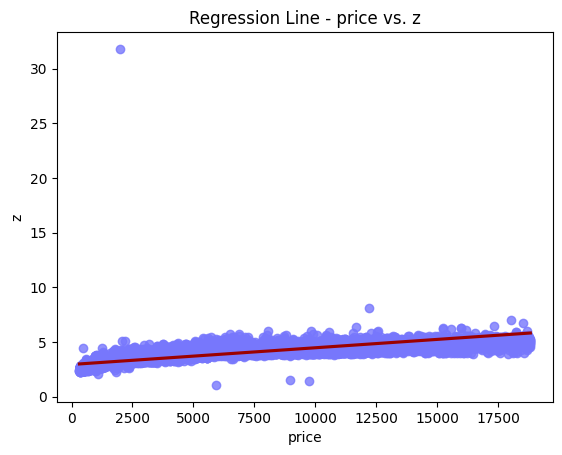

In [13]:
ax = sns.regplot(x="price", y="z", data=data, fit_reg=True, scatter_kws={"color": "#7777fc"}, line_kws={"color": "#9c0000"})
ax.set_title("Regression Line - price vs. z")

Text(0.5, 1.0, 'Regression Line - price vs. depth')

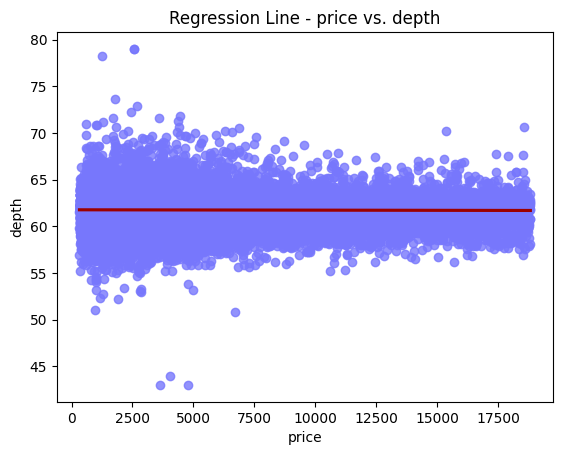

In [14]:
ax = sns.regplot(x="price", y="depth", data=data, fit_reg=True, scatter_kws={"color": "#7777fc"}, line_kws={"color": "#9c0000"})
ax.set_title("Regression Line - price vs. depth")

Text(0.5, 1.0, 'Regression Line - price vs. table')

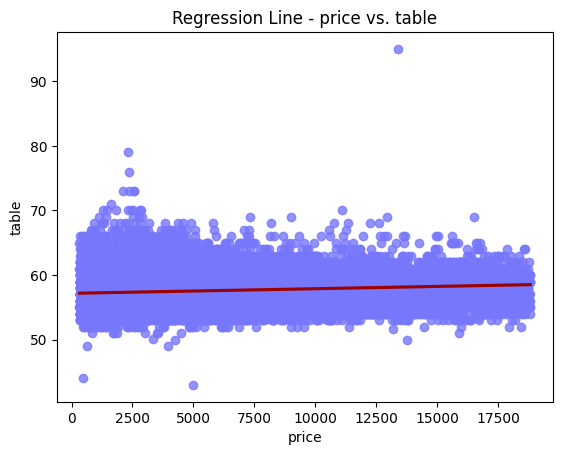

In [15]:
ax = sns.regplot(x="price", y="table", data=data, fit_reg=True, scatter_kws={"color": "#7777fc"}, line_kws={"color": "#9c0000"})
ax.set_title("Regression Line - price vs. table")

##### We can clearly spot outliers in these attributes. We should remove it.

In [16]:
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]

In [17]:
data.shape

(53907, 10)

##### Now, we have removed 13 regression outliers, let us have a look at pairplot again.

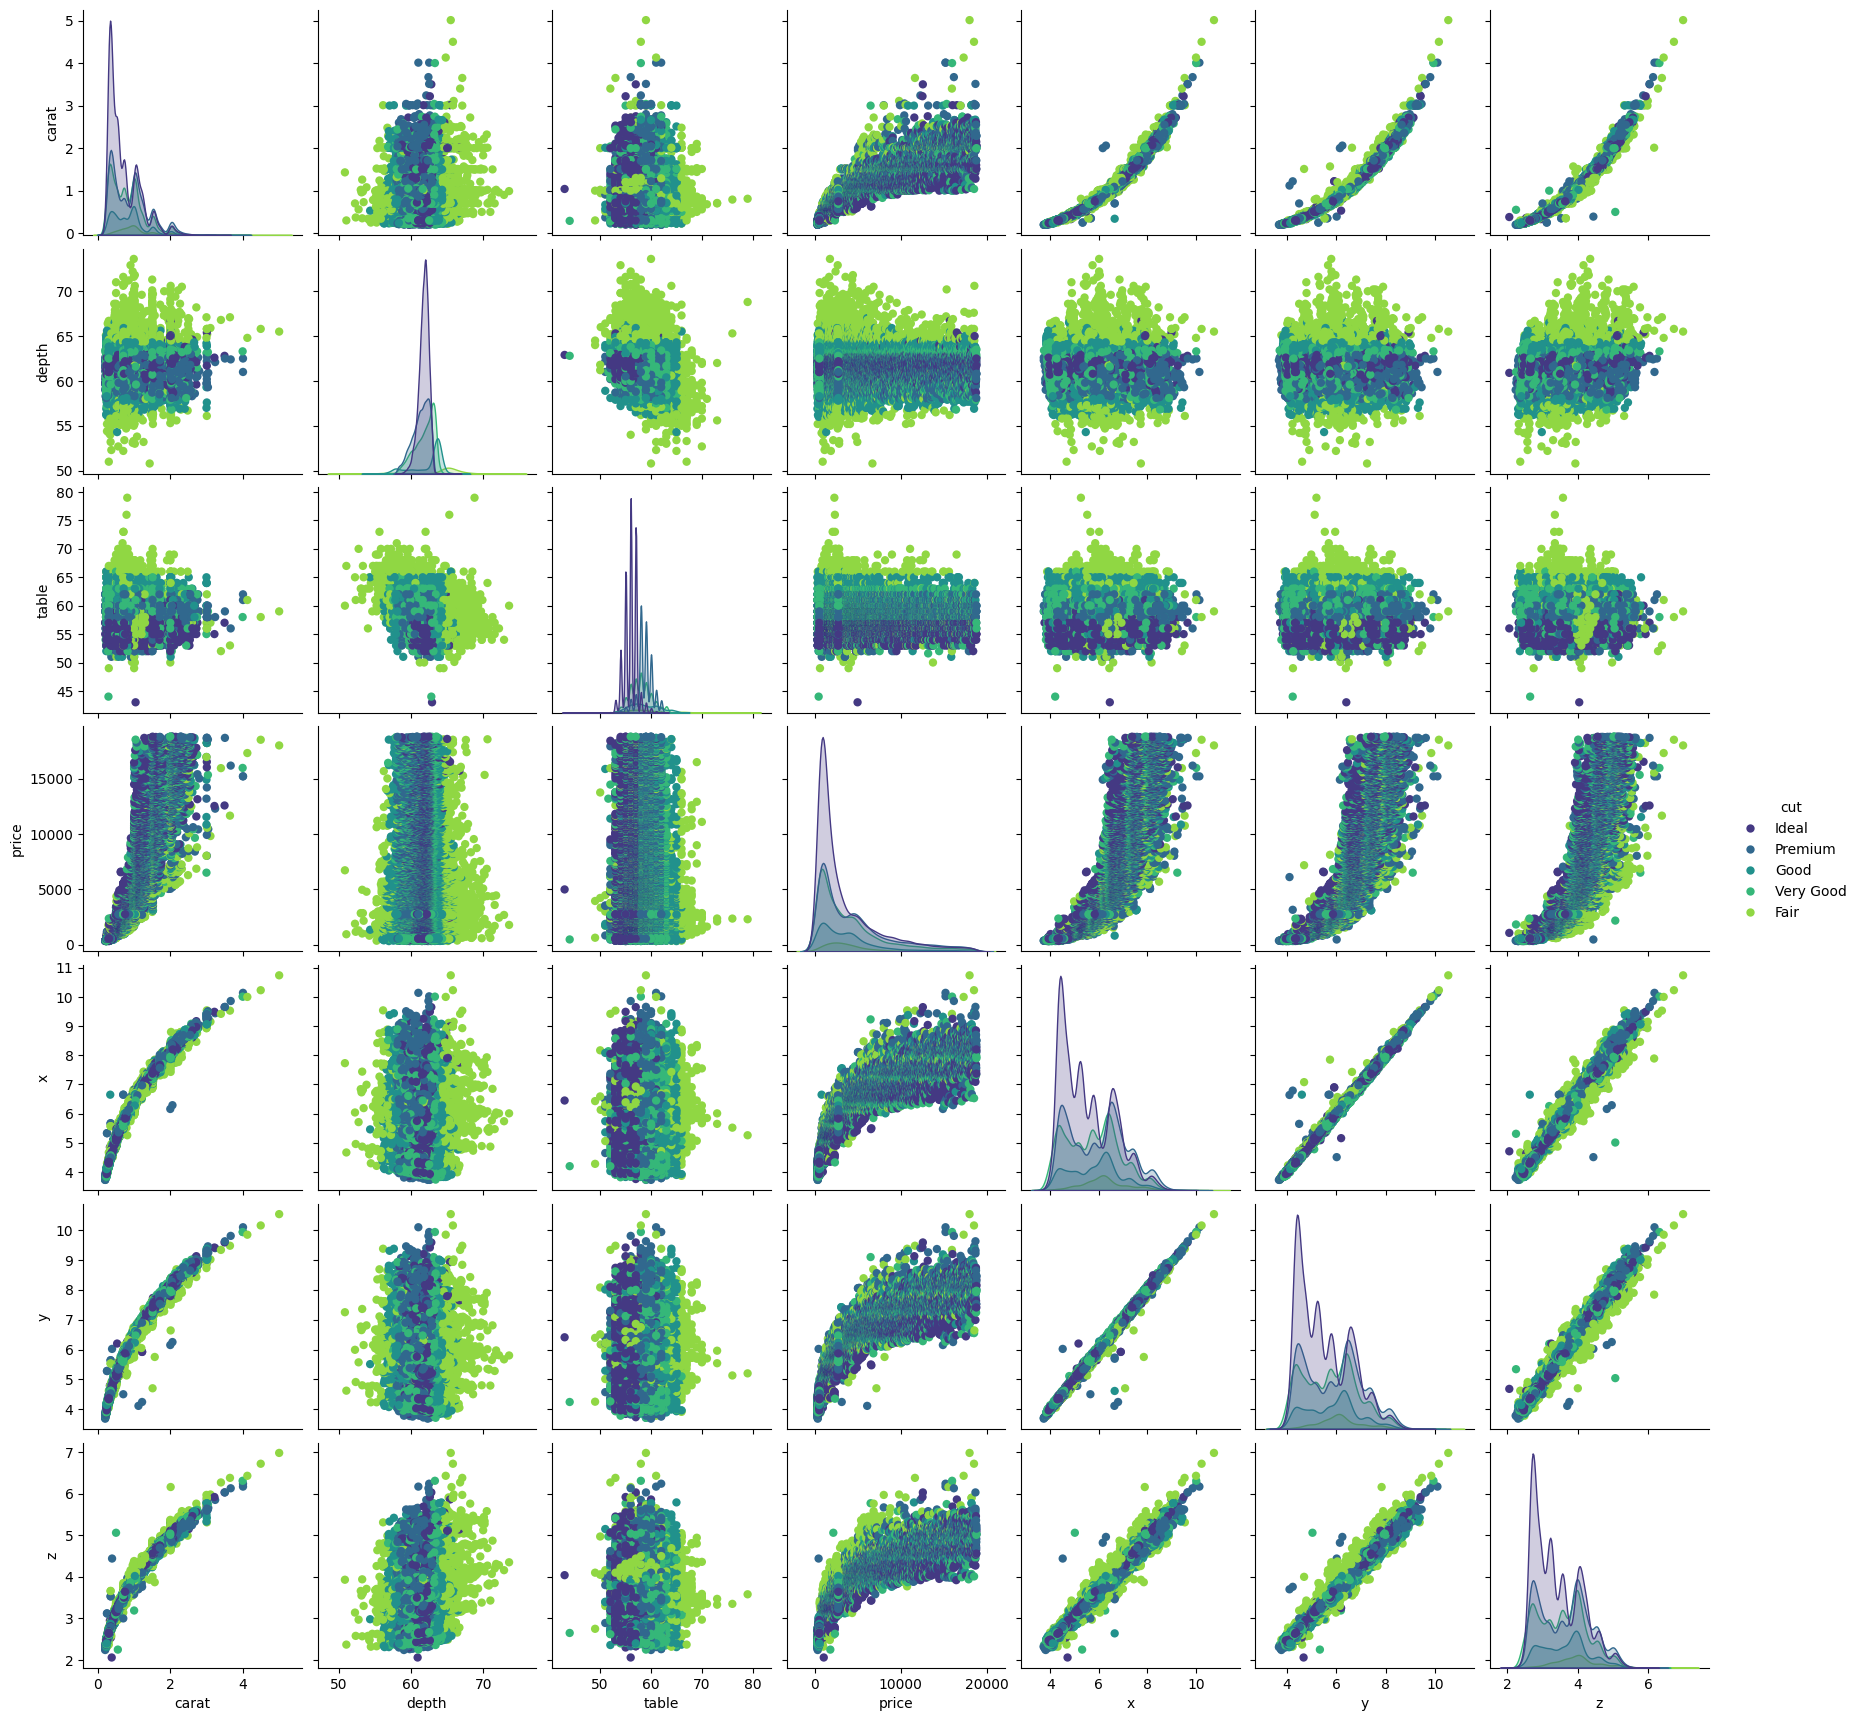

In [18]:
ax = sns.pairplot(data, hue="cut", palette="viridis", plot_kws={"edgecolor": "none"})

##### All outliers had been removed.
---
##### Now we will deal with the categorical variables.

In [19]:
s = (data.dtypes=="object")
object_cols = list(s[s].index)
print("Categorical Variables:")
print(object_cols)

Categorical Variables:
['cut', 'color', 'clarity']


##### We have three categorical variables. Let us have a look at them.
#### Violin Plot
- We will plot violin plot to see the distribution of data in those categories.

Text(0.5, 0, 'cut')

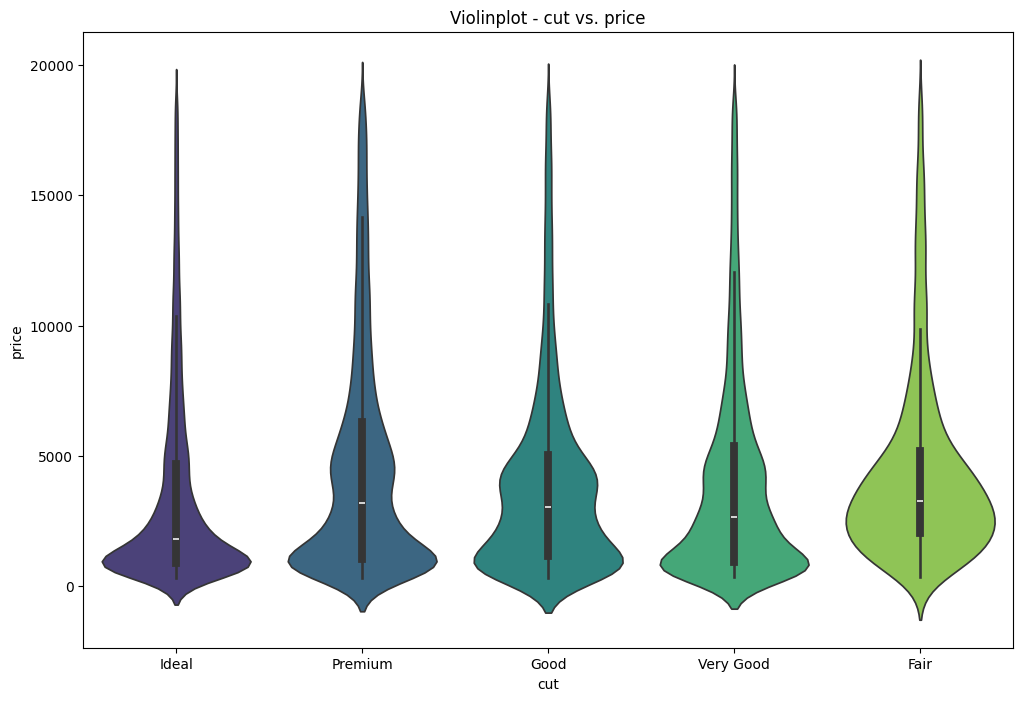

In [20]:
plt.figure(figsize=(12,8))
ax= sns.violinplot(x="cut", y="price", data=data, hue="cut", palette="viridis", density_norm="count")
ax.set_title("Violinplot - cut vs. price")
ax.set_ylabel("price")
ax.set_xlabel("cut")

Text(0.5, 0, 'color')

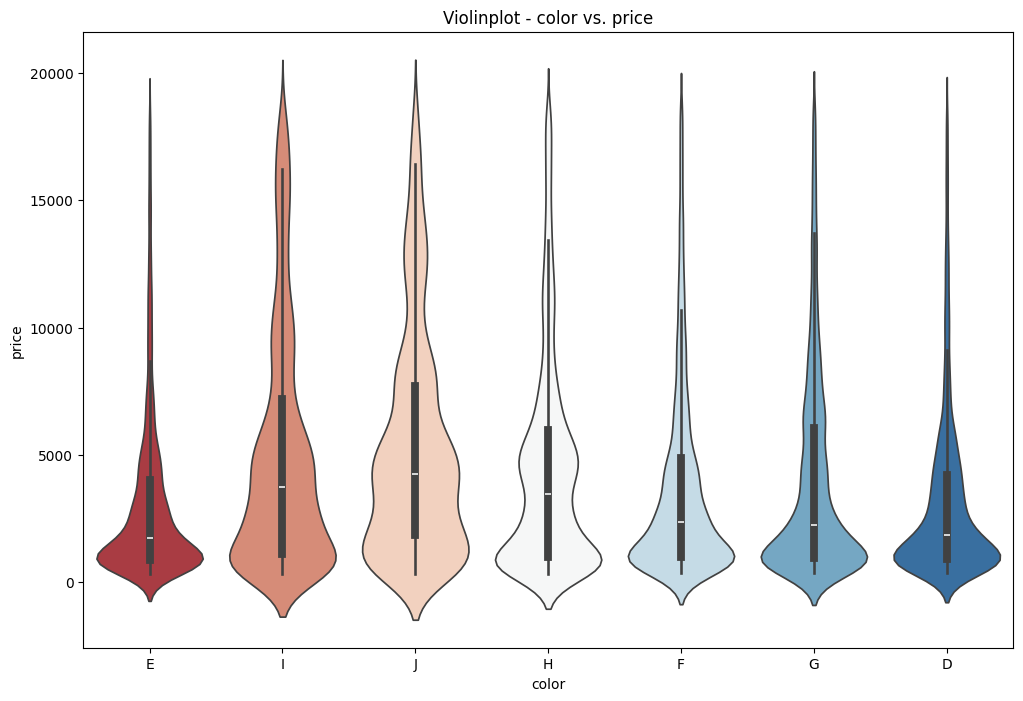

In [21]:
plt.figure(figsize=(12,8))
ax= sns.violinplot(x="color", y="price", data=data, hue="color", palette="RdBu", density_norm="count")
ax.set_title("Violinplot - color vs. price")
ax.set_ylabel("price")
ax.set_xlabel("color")

Text(0.5, 0, 'clarity')

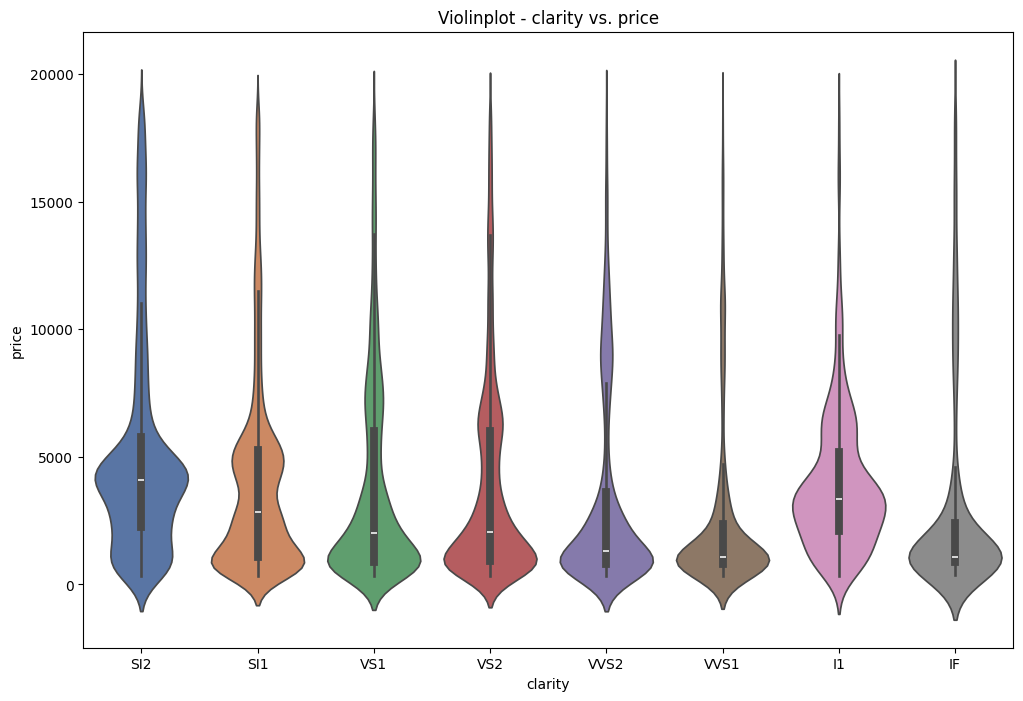

In [22]:
plt.figure(figsize=(12,8))
ax= sns.violinplot(x="clarity", y="price", data=data, hue="clarity", palette="deep", density_norm="count")
ax.set_title("Violinplot - clarity vs. price")
ax.set_ylabel("price")
ax.set_xlabel("clarity")

---
##### Let us now do label encoding of these data to get numeric values for our model.

In [23]:
label_data = data.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col]=label_encoder.fit_transform(label_data[col])

In [24]:
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [25]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


#### Correlation Matrix
- This helps us understand relation of one feature with other.

<Axes: >

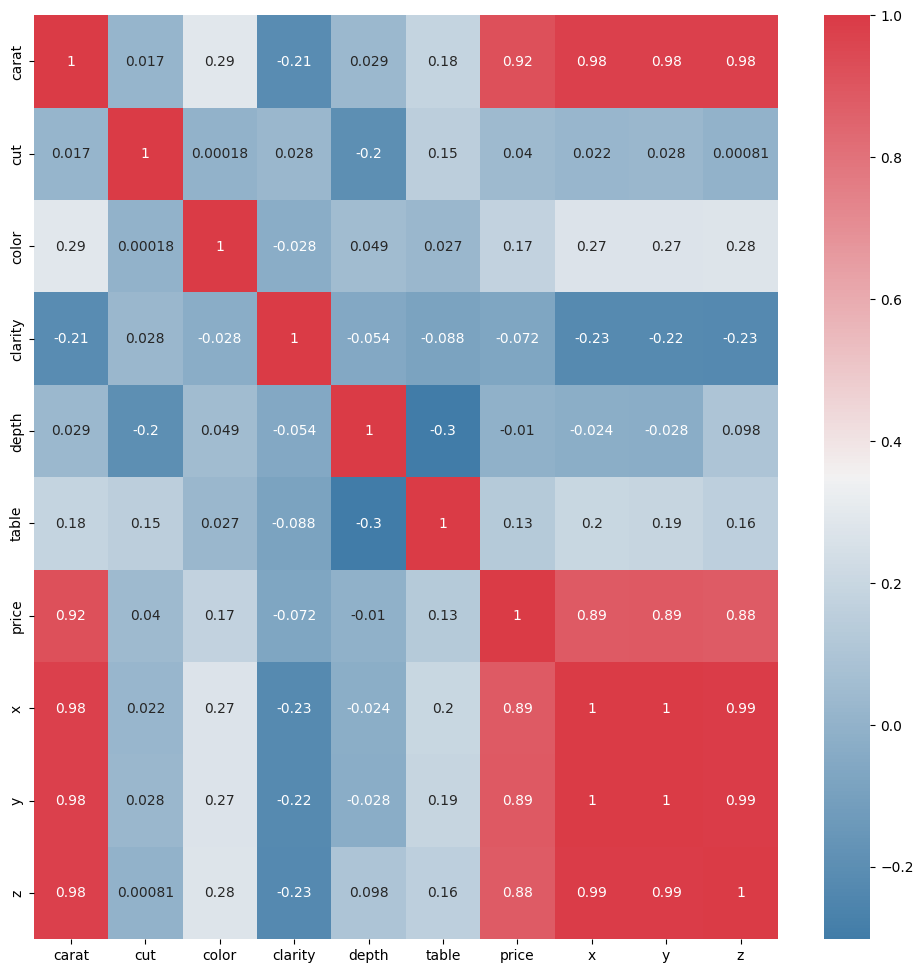

In [26]:
cmap = sns.diverging_palette(240, 10, s=75, l=50, n=6, as_cmap=True) 
corrmat= label_data.corr()
f, ax =plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, cmap=cmap, annot=True)

##### "x", "y and "z" show high correlation with "price"
##### "depth", "cut" and "table" show low correlation with "price"

---
### Model Building
- set features as X and target as y.
- We will build pipeline of standard scalar and five different regressors.
- We will fit all models on training data.
- Then get mean of cross-validation on the training set for all the models for negative root mean square error
- Pick the model with the best cross-validation score.

In [27]:
X= label_data.drop(["price"], axis=1)
y= label_data["price"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=7)

##### Pipelines for five standard scalar and model for different regressor

In [28]:
pipeline_lr= Pipeline([("scalar1", StandardScaler()),("lr_classifier", LinearRegression())])
pipeline_dt= Pipeline([("scalar2", StandardScaler()),("dt_classifier", DecisionTreeRegressor())])
pipeline_rf= Pipeline([("scalar3", StandardScaler()),("rf_classifier", RandomForestRegressor())])
pipeline_kn= Pipeline([("scalar4", StandardScaler()),("kn_classifier", KNeighborsRegressor())])
pipeline_xgb= Pipeline([("scalar5", StandardScaler()),("xgb_classifier", XGBRegressor())])

pipelines=[pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [29]:
cv_results_rms=[]
for i, model in enumerate (pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -753.917562 
RandomForest: -548.041127 
KNeighbors: -823.656082 
XGBRegressor: -547.645093 


In the above scores, **XGBClassifier** appears to be the model with the best scoring on negative root mean square error.

In [30]:
pred = pipeline_xgb.predict(X_test)

In [31]:
pred

array([5826.74  , 2906.1472, 4207.5264, ...,  883.508 , 1159.0402,
       7002.9854], shape=(13477,), dtype=float32)

---
#### Model Evaluation

In [32]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9803842902183533
Adjusted R^2: 0.9803711810338256
MAE: 280.17333984375
MSE: 307728.15625
RMSE: 554.7325087373192


---